# Demo to show the idea of the Min Energy in High FrEquencies for Short Time (MEH-FEST) detection method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import librosa
import librosa.display

def plot_time_domain_waveform(audio, Fs, title, file_name, 
                              start_time=0):    
    t_wav = np.arange(audio.shape[0]) / Fs + start_time
    print ("Fs = %d, audio signal length = %d" % (Fs, audio.shape[0]))
    
    plt.plot(t_wav, audio, color='r')
    plt.xlim(t_wav[0], t_wav[-1])
    plt.title(title)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()

def plot_spectrum_magnitude(audio, Fs, n_fft, hop_length, win_length,
                            low_index, title, file_name):
    magnitudes = np.abs(librosa.stft(audio, 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    
    energy = sum(np.square(magnitudes[low_index:]))
    print(energy)
    
    freq = np.arange(n_fft/2 + 1) * Fs / n_fft
    plt.plot(freq, magnitudes, 'b')
    plt.xlim(freq[0], freq[-1])
    plt.title(title)
    plt.xlabel('Frequence (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
    print("mean = %f, std = %f" % (np.mean(magnitudes),
                                   np.std(magnitudes)))
        
def plot_energy_stft(audio_path, n_fft, hop_length, win_length,
                     low_index, title, file_name):
    audio = librosa.load(audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length, 
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(energy.shape)
    print(min(energy))
    
    time_frame = np.arange(len(energy))
    plt.plot(time_frame, energy, 'xr-')
    plt.xlim(time_frame[0], time_frame[-1])
    plt.title(title)
    plt.xlabel('Time frame', fontsize=12)
    plt.ylabel('Energy in high frequencies', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()

def plot_energy_stft_both(org_audio_path, adv_audio_path, n_fft,
                          hop_length, win_length, low_index, 
                          x_max, title, file_name):
    audio = librosa.load(org_audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(min(energy))
    time_frame = np.arange(len(energy))    
    plt.plot(time_frame, energy, 'xr:', label='Original audio')
    
    audio = librosa.load(adv_audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(min(energy))
    time_frame = np.arange(len(energy))
    plt.plot(time_frame, energy, '+b-', label='Adversarial audio')
    
    plt.xlim(time_frame[0], x_max)
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('Time frame', fontsize=12)
    plt.ylabel('Energy in high frequencies', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()


def plot_mel_spectrogram(audio, Fs, n_fft, hop_length, win_length,
                         n_mels, specmin, specmax, title, file_name):
    mel_spec = librosa.feature.melspectrogram(audio, 
                                              sr=Fs, 
                                              n_fft=n_fft, 
                                              hop_length=hop_length,
                                              win_length=win_length,
                                              n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec)
    librosa.display.specshow(log_mel_spec, x_axis='time',
                             y_axis='mel', sr=Fs,
                             hop_length=hop_length,
                             cmap='coolwarm',
                             vmin=specmin, vmax=specmax)
    
    plt.xlabel('Time (seconds)',fontsize=12)
    plt.ylabel('Frequency (Hz)',fontsize=12)
    
    cbar = plt.colorbar(format='%+2.f dB')
    cbar.set_label(label='Magnitude (dB)',size=12)
    cbar.ax.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
def calculate_min_energy_stft(audio_path, n_fft, hop_length,
                              win_length, low_index) :
    audio = librosa.load(audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                      n_fft=n_fft, 
                                      hop_length=hop_length,
                                      win_length=win_length,
                                      center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(energy)
    min_emergy = min(energy)
    index_min_emergy = min(range(len(energy)), 
                         key = energy.__getitem__)
    return min_emergy, index_min_emergy 

The original audio is from: ~/Desktop/research/detection_fakebob/experiments/origin_audios/data/illegal-set/6829/6829-68769-0016.wav  

In [2]:
org_audio_path = '6829-68769-0016-org.wav'
IPython.display.Audio(org_audio_path)

The adversarial audio is from: ~/Desktop/research/detection_fakebob/experiments/gmm_epsilon_002/gmm-SV-targeted/4446/6829/6829-68769-0016.wav,
which is with a perturbation threshold of 0.002 in the GMM SV.
The FakeBob only took 1 iteration to generate this adversarial audio.

In [3]:
adv_audio_path = '6829-68769-0016-adv.wav'
IPython.display.Audio(adv_audio_path)

# Time domain waveforms

Fs = 16000, audio signal length = 65920


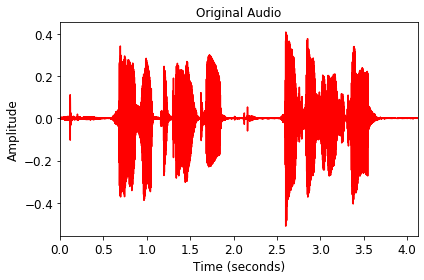

In [4]:
org_audio, Fs = librosa.load(org_audio_path, sr = 16000)
plot_time_domain_waveform(org_audio, Fs, "Original Audio", 
                          "./figs/time_waveform_org_audio.png")

Fs = 16000, audio signal length = 65920


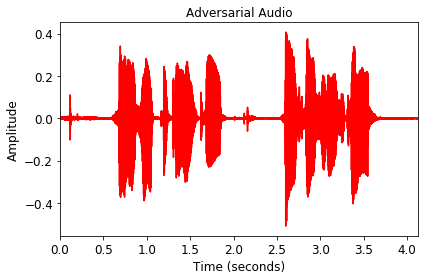

In [5]:
adv_audio, Fs = librosa.load(adv_audio_path, sr = 16000)
plot_time_domain_waveform(adv_audio, Fs, "Adversarial Audio", 
                          "./figs/time_waveform_adv_audio.png")

Fs = 16000, audio signal length = 65920


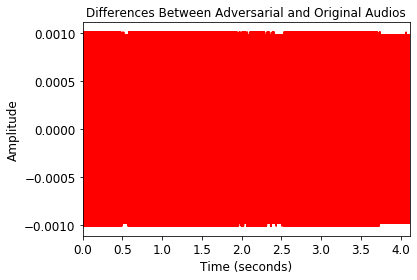

mean = 0.000001, std = 0.000987


In [6]:
difference = adv_audio - org_audio
plot_time_domain_waveform(difference, Fs, 
                          "Differences Between Adversarial and Original Audios", 
                          "./figs/time_waveform_differences.png")
print("mean = %f, std = %f" % (np.mean(difference), np.std(difference)))

# Mel Spectrograms
Note: the sample frequency is 16000 Hz. The range of frequency is between 0 and 8000 Hz. In the mel spectrograms, y-axis is in the log scale, so that 8000 Hz is not shown in the y-axis (the next number to 4096 is 8192).

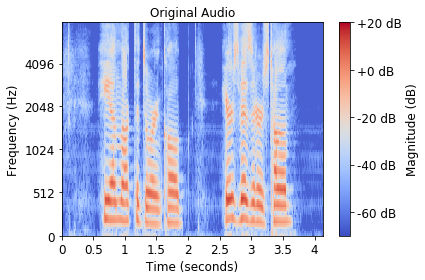

In [7]:
plot_mel_spectrogram(org_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Original Audio", 
                     file_name = "./figs/mel_spectrogram_org_audio.png")

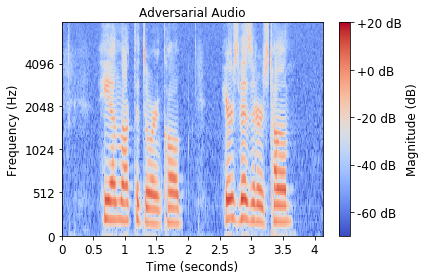

In [8]:
plot_mel_spectrogram(adv_audio, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400, 
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Adversarial Audio", 
                     file_name = "./figs/mel_spectrogram_adv_audio.png")

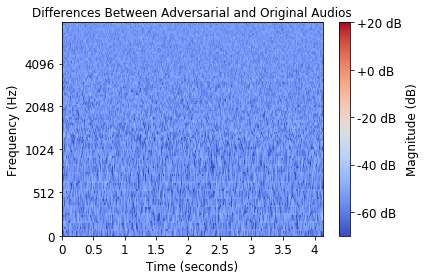

In [9]:
plot_mel_spectrogram(difference, Fs=16000, n_fft = 512, 
                     hop_length = 160, win_length = 400,
                     n_mels = 128, 
                     specmin = -70, specmax = 20, 
                     title = "Differences Between Adversarial and Original Audios", 
                     file_name = "./figs/mel_spectrogram_differences.png")

# MEH-FEST Detection Method

In [10]:
print(calculate_min_energy_stft(org_audio_path, 
                                n_fft = 512, 
                                hop_length = 160,
                                win_length = 400,
                                low_index = 224))
print(calculate_min_energy_stft(adv_audio_path, 
                                n_fft = 512, 
                                hop_length = 160,
                                win_length = 400,
                                low_index = 224))

[1.37390103e-03 1.14644016e-03 4.52739099e-04 1.20458868e-03
 3.99690447e-03 9.62475548e-04 1.75045710e-03 1.54144433e-03
 1.39263389e-03 7.29185203e-03 8.14012170e-01 7.21143112e-02
 2.38300441e-03 5.35434461e-04 5.58326428e-04 1.40408624e-03
 6.75031100e-04 6.01862208e-04 5.29832090e-04 3.52074392e-04
 1.79901428e-04 2.49504112e-04 4.12855210e-04 3.60990438e-04
 3.79342062e-04 6.74554845e-04 9.14072269e-04 6.05700247e-04
 5.72765886e-04 1.00590230e-03 4.18811600e-04 5.13243955e-04
 1.02025655e-03 4.69601218e-04 4.93469939e-04 7.64244702e-04
 1.21156045e-03 3.84719926e-04 4.15334420e-04 2.94334022e-04
 1.53333720e-04 1.62097582e-04 2.36371910e-04 2.44625611e-04
 9.40302125e-05 2.95353966e-05 4.95940003e-05 6.29467540e-05
 2.22575509e-05 1.33978701e-05 3.97949989e-05 3.80803904e-05
 1.17649906e-05 2.13130388e-05 3.01779328e-05 3.31911288e-05
 5.31298392e-05 1.84872610e-04 3.55638884e-04 9.00929794e-04
 4.43114573e-03 8.12838785e-03 1.47809908e-02 3.48733552e-02
 1.06030554e-01 1.120276

In [11]:
print(512/16000)
print(398*160/16000)
print((398*160+512)/16000)
print(350*160/16000)
print((350*160+512)/16000)

0.032
3.98
4.012
3.5
3.532


Look into specific time period: 398 * 160 / 16000 ~ (398 * 160 + 512) / 16000 = 3.98 s ~ 4.012 s.
As a comparason, show another time period: 3.5 s ~ 3.532 s at the end.

Fs = 16000, audio signal length = 512


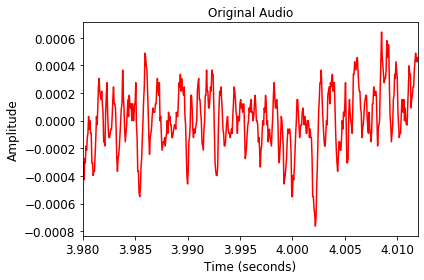

-0.00076293945
0.00064086914


In [12]:
n_fft = 512
index = 398
hop_length = 160

org_audio_short_time = org_audio[hop_length * index : 
                                 hop_length * index + n_fft]
plot_time_domain_waveform(org_audio_short_time, Fs, "Original Audio", 
                          "./figs/time_waveform_org_audio_short_time.png",
                          hop_length * index / Fs)

print(min(org_audio_short_time))
print(max(org_audio_short_time))

Fs = 16000, audio signal length = 512


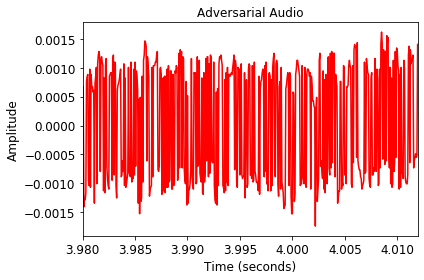

-0.001739502
0.0016174316


In [13]:
adv_audio_short_time = adv_audio[hop_length * index : 
                                 hop_length * index + n_fft]
plot_time_domain_waveform(adv_audio_short_time, Fs, "Adversarial Audio", 
                          "./figs/time_waveform_adv_audio_short_time.png",
                          hop_length * index / Fs)

print(min(adv_audio_short_time))
print(max(adv_audio_short_time))

Fs = 16000, audio signal length = 512


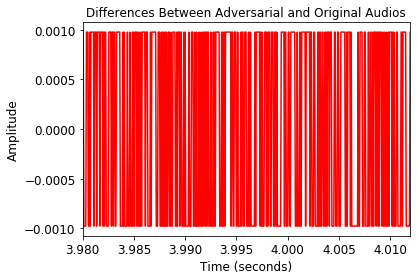

mean = 0.000031, std = 0.000976


In [14]:
difference_short_time = adv_audio_short_time - org_audio_short_time
plot_time_domain_waveform(difference_short_time, Fs, 
                          "Differences Between Adversarial and Original Audios", 
                          "./figs/time_waveform_differences_short_time.png",
                          hop_length * index / Fs)
print("mean = %f, std = %f" % (np.mean(difference_short_time), 
                               np.std(difference_short_time)))

Spectrum of short-time signals (both original and adversarial audios):

[7.744055e-06]


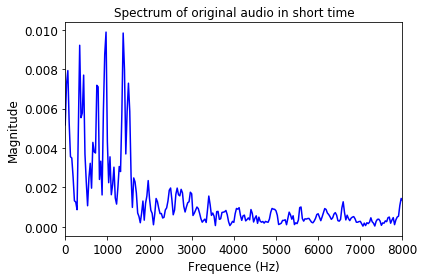

mean = 0.001371, std = 0.001890


In [15]:
plot_spectrum_magnitude(org_audio_short_time, Fs = 16000, 
                        n_fft = 512, hop_length = 512, 
                        win_length = 400, low_index = 224, 
                        title = "Spectrum of original audio in short time", 
                        file_name = "./figs/spectrum_org_audio_short_time.png")

[0.00557245]


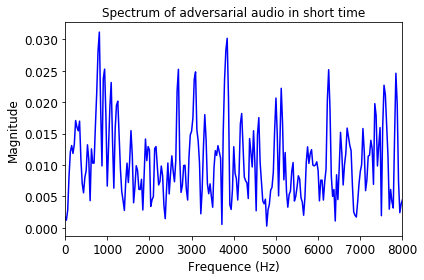

mean = 0.010551, std = 0.006078


In [16]:
plot_spectrum_magnitude(adv_audio_short_time, Fs=16000, 
                        n_fft = 512, hop_length = 512, 
                        win_length = 400, low_index = 224,  
                        title = "Spectrum of adversarial audio in short time", 
                        file_name = "./figs/spectrum_adv_audio_short_time.png")

[0.00555374]


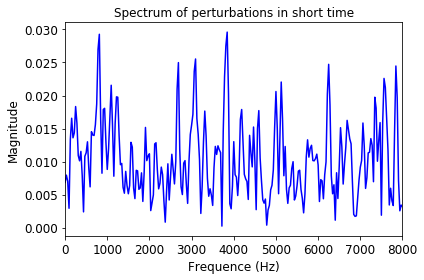

mean = 0.010428, std = 0.005818


In [17]:
plot_spectrum_magnitude(difference_short_time, Fs=16000, 
                        n_fft = 512, hop_length = 512, 
                        win_length = 400, low_index = 224,  
                        title = "Spectrum of perturbations in short time", 
                        file_name = "./figs/spectrum_perturbation_audio_short_time.png")


Another short time signals between 3.5 s ~ 3.532 s.

Fs = 16000, audio signal length = 512


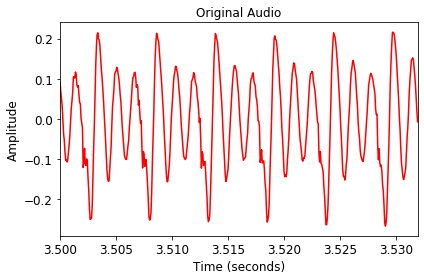

-0.26638794
0.21633911


In [18]:
n_fft = 512
index = 350
hop_length = 160

org_audio_short_time = org_audio[hop_length * index : 
                                 hop_length * index + n_fft]
plot_time_domain_waveform(org_audio_short_time, Fs, "Original Audio", 
                          "./figs/time_waveform_org_audio_short_time_2.png",
                          hop_length * index / Fs)

print(min(org_audio_short_time))
print(max(org_audio_short_time))

Fs = 16000, audio signal length = 512


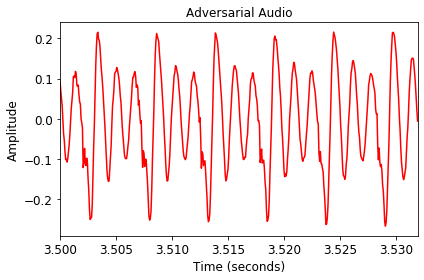

-0.2673645
0.21588135


In [19]:
adv_audio_short_time = adv_audio[hop_length * index : 
                                 hop_length * index + n_fft]
plot_time_domain_waveform(adv_audio_short_time, Fs, "Adversarial Audio", 
                          "./figs/time_waveform_adv_audio_short_time_2.png",
                          hop_length * index / Fs)

print(min(adv_audio_short_time))
print(max(adv_audio_short_time))

Fs = 16000, audio signal length = 512


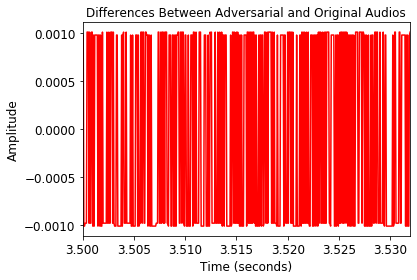

mean = -0.000066, std = 0.000990


In [20]:
difference_short_time = adv_audio_short_time - org_audio_short_time
plot_time_domain_waveform(difference_short_time, Fs, 
                          "Differences Between Adversarial and Original Audios", 
                          "./figs/time_waveform_differences_short_time_2.png",
                          hop_length * index / Fs)
print("mean = %f, std = %f" % (np.mean(difference_short_time), 
                               np.std(difference_short_time)))

Show the energy in high frequencies based on time frames:

(409,)
7.744055e-06


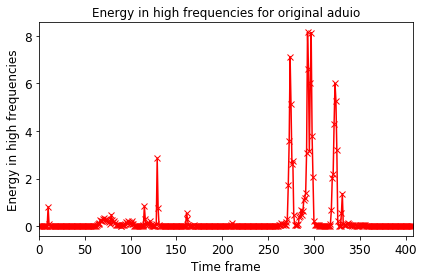

In [21]:
plot_energy_stft(org_audio_path, 
                 n_fft = 512, 
                 hop_length = 160,
                 win_length = 400,
                 low_index = 224, 
                 title = "Energy in high frequencies for original aduio", 
                 file_name = "./figs/hf-stft_org_audio.png")

(409,)
0.0019176337


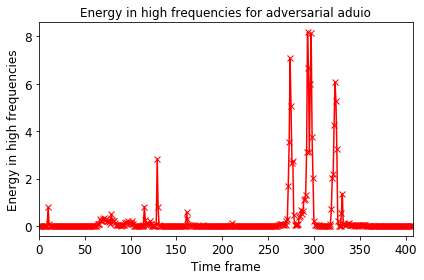

In [22]:
plot_energy_stft(adv_audio_path, 
                 n_fft = 512, 
                 hop_length = 160,
                 win_length = 400,
                 low_index = 224, 
                 title = "Energy in high frequencies for adversarial aduio", 
                 file_name = "./figs/hf-stft_adv_audio.png")

7.744055e-06
0.0019176337


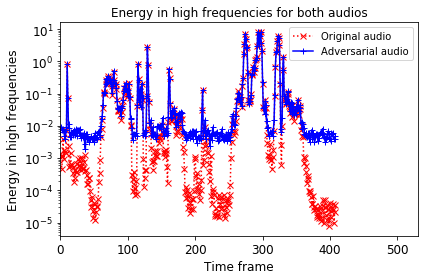

In [23]:
plot_energy_stft_both(org_audio_path, 
                      adv_audio_path, 
                      n_fft = 512, 
                      hop_length = 160,
                      win_length = 400,
                      low_index = 224, 
                      x_max = 530,
                      title = "Energy in high frequencies for both audios", 
                      file_name = "./figs/hf-stft_both.png")